<a href="https://colab.research.google.com/github/yeneua/HG-MLDL/blob/main/8_3_%ED%95%A9%EC%84%B1%EA%B3%B1_%EC%8B%A0%EA%B2%BD%EB%A7%9D%EC%9D%98_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **8.3 합성곱 신경망의 시각화**


*   가중치 시각화: 합성곱 층의 가중치를 이미지로 출력하는 것
 - 합성곱 신경망은 주로 이미지를 다루기 떄문에 가중치가 시각적인 패턴을 학습하는지 알아볼 수 있음.

*   특성맵 시각화: 합성곱 층의 활성화 출력을 이미지로 그리는 것
 - 가중치 시각화와 함께 비교하여 각 필터가 이미지의 어느 부분을 활성화시키는지 확인할 수 있음.

*   함수형 API: 케라스에서 신경망 모델을 만드는 방법 중 하나
 - Model 클래스에 모델의 입력과 출력을 지정함. 
 - 전형적으로 입력은 Input() 함수를 사용하여 정의하고 출력은 마지막 층의 출력으로 정의함




In [ ]:
# 가중치 시각화

## 8.2 신경망 모델 ############################
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

(train_input, train_target), (test_input, test_target) =\
    keras.datasets.fashion_mnist.load_data()    # 훈련 세트와 테스트 세트로 나눔

train_scaled = train_input.reshape(-1, 28, 28, 1) /255.0    # 데이터 스케일을 0~255에서 0~1사이로 바꿈

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42) 

model = keras.Sequential() 

model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(2)) 

model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2)) 

model.add(keras.layers.Flatten())       
model.add(keras.layers.Dense(100, activation='relu'))   
model.add(keras.layers.Dropout(0.4))    
model.add(keras.layers.Dense(10, activation='softmax'))


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Classes = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0
#################################################################################################

Epoch 1/20
1500/1500 [==============================] - 62s 41ms/step - loss: 0.5265 - accuracy: 0.8091 - val_loss: 0.3330 - val_accuracy: 0.8798
Epoch 2/20
1500/1500 [==============================] - 61s 41ms/step - loss: 0.3501 - accuracy: 0.8748 - val_loss: 0.2861 - val_accuracy: 0.8937
Epoch 3/20
1500/1500 [==============================] - 61s 41ms/step - loss: 0.2983 - accuracy: 0.8920 - val_loss: 0.2615 - val_accuracy: 0.9024
Epoch 4/20
1500/1500 [==============================] - 60s 40ms/step - loss: 0.2680 - accuracy: 0.9042 - val_loss: 0.2374 - val_accuracy: 0.9128
Epoch 5/20
1500/1500 [==============================] - 60s 40ms/step - loss: 0.2474 - accuracy: 0.9106 - val_loss: 0.2322 - val_accuracy: 0.9157
Epoch 6/20
1500/1500 [==============================] - 60s 40ms/step - loss: 0.2231 - accuracy: 0.9194 - val_loss: 0.2205 - val_accuracy: 0.9179
Epoch 7/20
1500/1500 [==============================] - 60s 40ms/step - loss: 0.2064 - accuracy: 0.9246 - val_loss: 0.2191 -

In [ ]:
# 케라스 모델에 추가한 층 불러오기
model = keras.models.load_model('best-cnn-model.h5')
  # 케라스 모델에 추가한 층은 layers 속성에 저장되어 있음 
  # 이 속성은 파이썬 리스트

In [ ]:
model.layers   # model.layers를 출력

In [ ]:
conv = model.layers[0]

print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [ ]:
conv_weights = conv.weights[0].numpy()

print(conv_weights.mean(), conv_weights.std())

-0.016035534 0.24512783


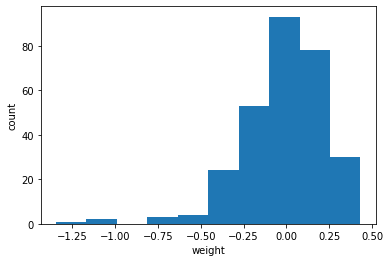

In [ ]:
import matplotlib.pyplot as plt

plt.hist(conv_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

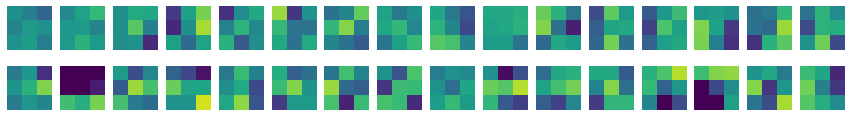

In [ ]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))

for i in range(2):
  for j in range(16):
    axs[i,j].imshow(conv_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
    axs[i,j].axis('off')
    
plt.show()

In [ ]:
no_training_model = keras.Sequential()

no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', 
                                          padding='same', input_shape=(28,28,1)))

In [ ]:
no_training_conv = no_training_model.layers[0]

print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [ ]:
no_training_weights = no_training_conv.weights[0].numpy()

print(no_training_weights.mean(), no_training_weights.std())

-0.00738881 0.083642766


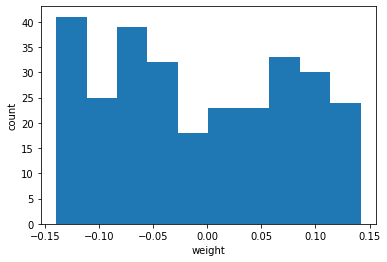

In [ ]:
plt.hist(no_training_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

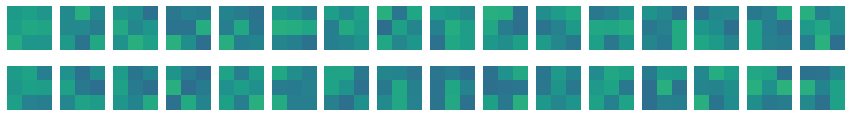

In [ ]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))

for i in range(2):
  for j in range(16):
    axs[i,j].imshow(no_training_weights[:,:,0,i*16 + j], vmin=-0.5,vmax=0.5)
    axs[i,j].axis('off')
    
plt.show()

In [ ]:
# 함수형 API

 # 신경망 모델을 만들 때 케라스 Sequential 클래스를 사용-이 클래스는 층을 차례대로 쌓은 모델을 만듦
 # 딥러닝에서는 복잡한 모델이 많은 이런 경우 함수형 API(functional API)를 사용함
 # 함수형 API는 케라스의 Model 클래스를 사용하여 모델을 만듦

print(model.input)

conv_acti = keras.Model(model.input, model.layers[0].output)
  # model 객체의 predict 메서드를 호출하면 최종 출력층의 확률을 반환함
  # conv_acti의 predict() 메서드를 호출하면 첫 번째 Conv2D의 출력을 반환할 것

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_12_input'), name='conv2d_12_input', description="created by layer 'conv2d_12_input'")


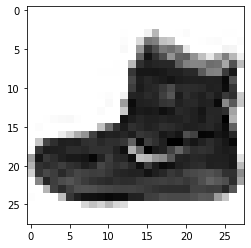

In [ ]:
# 특성 맵 시각화

 # 케라스로 패션 MNIST 데이터셋을 읽은 후 훈련 세트에 있는 첫 번째 샘플을 그려봄
(train_input, train_target), (test_input, test_target) =\
  keras.datasets.fashion_mnist.load_data()
  
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [ ]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0 

feature_maps = conv_acti.predict(inputs)

In [ ]:
print(feature_maps.shape) 
  # conv_acti.predict()메서드가 출력한 feature_maps의 크기를 확인

(1, 28, 28, 32)


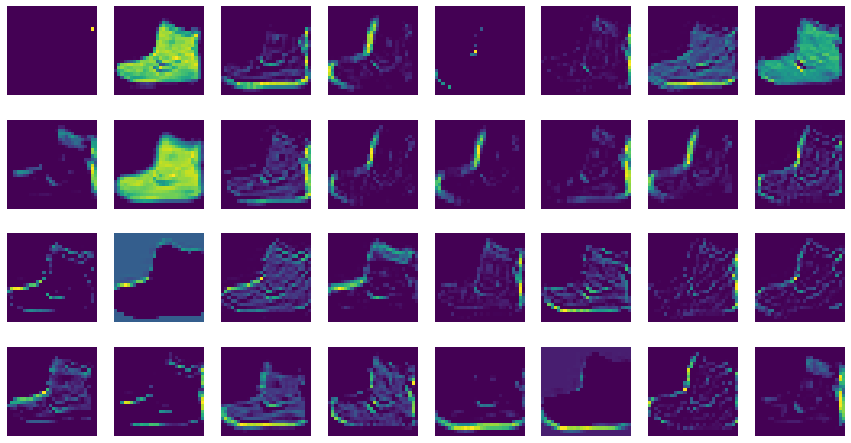

In [ ]:
# 맷플롯립의 imshow 함수로 특성 맵 그리기 

fig, axs = plt.subplots(4, 8, figsize=(15,8))
for i in range(4):
  for j in range(8):
    axs[i, j].imshow(feature_maps[0, :, :, i*8 +j])
    axs[i, j].axis('off')
plt.show()

In [ ]:
# 두 번째 합성곱 층이 만든 특성 맵도 같은 방식으로 확인
 # model 객체의 입력과 두 번째 합성곱 층인 model.layers[2]의 출력을 연결한 conv2_acti 모델 만듦

conv2_acti = keras.Model(model.input, model.layers[2].output)

feature_maps = conv2_acti.predict(train_input[0:1].reshape(-1, 28, 28, 1)/ 255.0)

print(feature_maps.shape)

(1, 14, 14, 64)


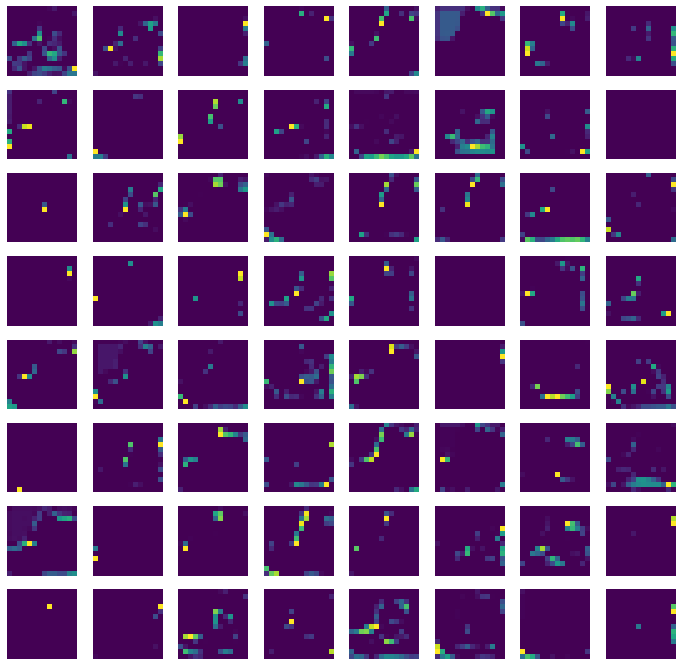

In [ ]:
# 64개의 특성 맵을 8개씩 나누어 imshow() 함수로 그림
fig, axs = plt.subplots(8, 8, figsize=(12, 12))

for i in range(8):
  for j in range(8):
    axs[i,j].imshow(feature_maps[0, :, :, i*8 +j])
    axs[i,j].axis('off')
    
plt.show()
  # 합성곱 층을 많이 쌓을수록 직관적으로 이해하기가 어려움
  # 합성곱 신경망의 앞부분에 있는 합성곱 층은 이미지의 시각적인 정보를 감지하고 
  #  뒤쪽에 있는 합성곱 층은 앞쪽에서 감지한 시각적인 정보를 바탕으로 추상적인 정보를 학습한다고 볼 수 있음